<a href="https://colab.research.google.com/github/sankarsasmal/Python/blob/master/Statistics_with_Python_Quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files
uploaded = files.upload()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving DOE_Python.csv to DOE_Python.csv


In [2]:
import io
df=pd.read_csv(io.BytesIO(uploaded['DOE_Python.csv']))
print(df.head())
#X1=wing length, X2=no of paperclips

   Sr_No  Sq_No  Repeat  X1_cm  X2_no  Flight_time_S
0      1      2       1      6      1           2.41
1      2     10       2      6      1           2.38
2      3      5       3      6      1           2.53
3      4      8       1     12      1           3.11
4      5      3       2     12      1           3.20


In [3]:
#https://www.youtube.com/watch?v=UgtjatBt3vY
df = df[['X1_cm','X2_no', 'Flight_time_S']]
df.head()

,X1_cm,X2_no,Flight_time_S
0,6,1,2.41
1,6,1,2.38
2,6,1,2.53
3,12,1,3.11
4,12,1,3.20


In [4]:
df.corr()

,X1_cm,X2_no,Flight_time_S
X1_cm,1.000000,0.000000,0.854775
X2_no,0.000000,1.000000,-0.491041
Flight_time_S,0.854775,-0.491041,1.000000


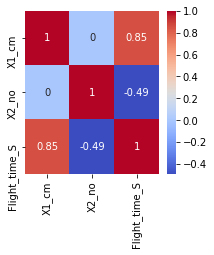

In [5]:
plt.figure(figsize=(3,3))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [0]:
#ANOVA interaction plot
#https://www.youtube.com/watch?v=v4y6nS31t8k
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.factorplots import interaction_plot

In [8]:
from google.colab import files
uploaded = files.upload()

Saving DOE_Python.csv to DOE_Python (1).csv


In [10]:
import io
df=pd.read_csv(io.BytesIO(uploaded['DOE_Python.csv']))
df = df[['X1_cm','X2_no', 'Flight_time_S']]
df.head()

,X1_cm,X2_no,Flight_time_S
0,6,1,2.41
1,6,1,2.38
2,6,1,2.53
3,12,1,3.11
4,12,1,3.20


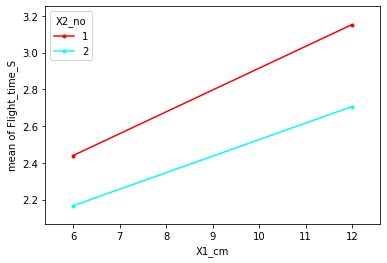

In [11]:
interaction_plot(df['X1_cm'],df['X2_no'],df['Flight_time_S'])
plt.show()

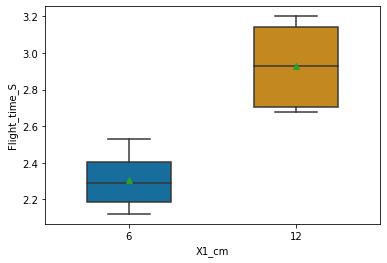

In [39]:
sns.boxplot(y='Flight_time_S', x='X1_cm', 
                 data=df, 
                 width=0.5,showmeans=True,
                 palette="colorblind")

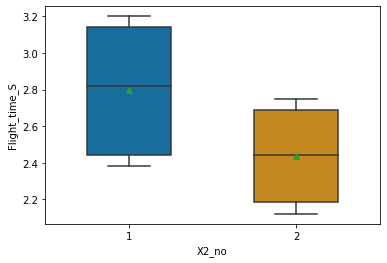

In [38]:
sns.boxplot(y='Flight_time_S', x='X2_no', 
                 data=df, 
                 width=0.5, showmeans=True,
                 palette="colorblind")

In [37]:
df.groupby(['X1_cm']).mean()

,X2_no,Flight_time_S
X1_cm,,
6,1.5,2.303333
12,1.5,2.930000


In [29]:
df.groupby(['X2_no']).mean()

,X1_cm,Flight_time_S
X2_no,,
1,9,2.796667
2,9,2.436667
